In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets

data_files = [
    './data/4mu_2011.csv',
    './data/4e_2011.csv',
    './data/2e2mu_2011.csv',
    './data/4mu_2012.csv',
    './data/4e_2012.csv',
    './data/2e2mu_2012.csv',
]

df = pd.concat([pd.read_csv(data_file) for data_file in data_files])

df.head()

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,...,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,173657,34442568,13,35.9978,32.7631,-4.41922,-14.2436,33.0598,-0.418519,-0.134075,...,-1.20978,11.35650,1.29029,11.42070,0.112739,1.676920,1,62.5513,20.5205,91.4517
1,166512,337493970,13,52.9826,-49.9170,8.17082,15.7696,50.5813,0.306925,2.979340,...,2.32913,-13.06840,27.14400,13.27430,1.463510,-1.394420,1,92.1352,90.2049,235.8800
2,171091,69105221,13,165.9750,-12.6280,-30.22890,162.7100,32.7605,2.305880,-1.966510,...,-8.09683,3.05681,23.28190,8.65464,1.715610,2.780600,-1,58.3874,14.3541,79.3858
3,172952,559839432,13,110.2600,-69.1510,68.83630,-51.3524,97.5720,-0.504613,2.358470,...,3.02072,8.34856,-4.13324,8.87824,-0.450186,1.223630,1,91.1877,37.3758,232.9290
4,167282,44166176,-13,54.3881,-27.4999,-43.86520,-16.6628,51.7726,-0.316533,-2.130770,...,4.64276,-2.38618,4.41465,5.22007,0.767963,-0.474752,-1,90.7513,14.7350,119.2900


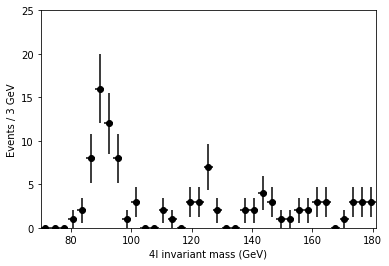

In [6]:
rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(
    df['M'],
    bins=nbins,
    range=(rmin,rmax),
)

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

plt.errorbar(center, hist, xerr=xerrs, yerr=yerrs, linestyle='None', color='black', marker='o')

plt.xlabel('4l invariant mass (GeV)')
plt.ylabel('Events / 3 GeV')
plt.ylim(0, 25)
plt.xlim(rmin, rmax)
plt.show()

In [7]:
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])

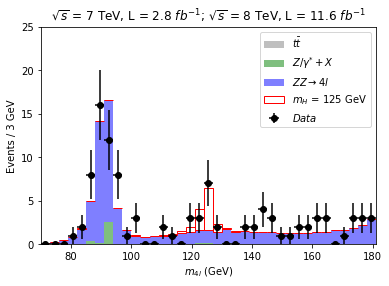

In [15]:
#ttbar 
ttbar_bar = plt.bar(center, ttbar, align='center', 
                    width=width, color='gray', linewidth=0, 
                    edgecolor='b', alpha=0.5)

#DY
dy_bar = plt.bar(center, dy, align='center', 
                 width=width, color='g', linewidth=0, 
                 edgecolor='black', alpha=0.5, bottom=ttbar)

#ZZ
zz_bar = plt.bar(center, zz, align='center', 
                 width=width, color='b', linewidth=0, 
                 edgecolor='black', alpha=0.5, bottom=ttbar+dy)

#HZZ
hzz_bar = plt.bar(center, hzz, align='center', 
                  width=width, color='w', linewidth=1, 
                  edgecolor='r', bottom=ttbar+dy+zz)

#data
data_bar = plt.errorbar(center, hist, 
                        xerr=xerrs, yerr=yerrs, 
                        linestyle='None', color='black', marker='o')

plt.title(r'$\sqrt{s}$ = 7 TeV, L = $2.8~fb^{-1}$; $\sqrt{s}$ = 8 TeV, L = $11.6~fb^{-1}$')

plt.legend(
    [
        ttbar_bar, 
         dy_bar, 
         zz_bar, 
         hzz_bar, 
         data_bar
    ], 
    [
        r'$t\bar{t}$',
        r'$Z/\gamma^{*} + X$',
        r'$ZZ \rightarrow 4l$',
        r'$m_{H}$ = 125 GeV',
        r'$Data$'
    ]
)

plt.xlabel(r'$m_{4l}$ (GeV)')
plt.ylabel(r'Events / 3 GeV')
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.show()

In [16]:
@widgets.interact_manual(
    rmin=(70,800),
    rmax=(70,800),
    bins=(10,100)
)

def plot(rmin=70, rmax=181, bins=37):
    
    h, b, i = plt.hist(df['M'], bins=bins, range=(rmin,rmax))
    plt.ylabel(r'')
    plt.xlabel(r'$m_{4l}$ (GeV)')
    plt.show()

interactive(children=(IntSlider(value=70, description='rmin', max=800, min=70), IntSlider(value=181, descripti…